In [1]:
import json

project_name = "jfreechart"
#project_name = "argouml"
package_dependency_file = "input/" + project_name + "/all-package-deps.cmr"
with open(package_dependency_file, 'r') as file:
    package_dependency_data = json.load(file)

package_id_file = "input/" + project_name + "/idmap.json"
with open(package_id_file, 'r') as file:
    package_id_data = json.load(file)

In [2]:
package_dependency_graph_data = package_dependency_data['graph']
print("Keys in the graph:", package_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [3]:
# Get key from value
def get_key(val): 
    for key, value in package_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the package name from the package id
def get_package_name(package_id):
    package_name_with_prefix = get_key(package_id)
    package_name = package_name_with_prefix.split('P')[1]
    return package_name

In [4]:
# Generate the graph data
import networkx as nx

G = nx.MultiDiGraph()

def add_nodes_to_graph(graph, nodes):
    for node in nodes:
        package_id = node['type']
        package_name = get_package_name(package_id)
        print("Package name:", package_name)
        graph.add_node(package_name)
        
add_nodes_to_graph(G, package_dependency_graph_data['vList'])

Package name: org.jfree.chart.plot.pie
Package name: org.jfree.data.gantt
Package name: org.jfree.chart.internal
Package name: org.jfree.chart.util
Package name: org.jfree.chart.date
Package name: org.jfree.chart.title
Package name: org.jfree.chart.entity
Package name: org.jfree.chart.renderer.category
Package name: org.jfree.data.io
Package name: org.jfree.data.statistics
Package name: org.jfree.chart.event
Package name: org.jfree.chart.block
Package name: org.jfree.data.json
Package name: org.jfree.chart.legend
Package name: org.jfree.chart.axis
Package name: org.jfree.chart.labels
Package name: org.jfree.chart.imagemap
Package name: org.jfree.chart.text.format
Package name: org.jfree.chart.encoders
Package name: org.jfree.chart.plot.flow
Package name: org.jfree.chart.annotations
Package name: org.jfree.chart.plot
Package name: org.jfree.chart.api
Package name: org.jfree.data
Package name: org.jfree.data.time.ohlc
Package name: org.jfree.chart.urls
Package name: org.jfree.data.catego

In [5]:
def add_edges_to_graph(graph, edgeList):
    for edges in edgeList:
        for edge in edges['L']:
            source_package_id = edge['s']
            source_package_name = get_package_name(source_package_id)
            destination_package_id = edge['d']
            destination_package_name = get_package_name(destination_package_id)
            weight = edge['w']
            print(f"Edge: {source_package_name} -> {destination_package_name}, weight: {weight}")
            graph.add_edge(source_package_name, destination_package_name, weight=weight)

add_edges_to_graph(G, package_dependency_graph_data['eList'])

Edge: org.jfree.chart.entity -> org.jfree.data.general, weight: 3
Edge: org.jfree.chart.entity -> org.jfree.data.general, weight: 3
Edge: org.jfree.chart.annotations -> org.jfree.chart.entity, weight: 3
Edge: org.jfree.chart.annotations -> org.jfree.chart.entity, weight: 2
Edge: org.jfree.chart.annotations -> org.jfree.chart.entity, weight: 3
Edge: org.jfree.chart.entity -> org.jfree.chart.title, weight: 2
Edge: org.jfree.chart.entity -> org.jfree.chart.title, weight: 2
Edge: org.jfree.chart.entity -> org.jfree.chart.title, weight: 2
Edge: org.jfree.data.xy -> org.jfree.data, weight: 9
Edge: org.jfree.data.xy -> org.jfree.data, weight: 7
Edge: org.jfree.data.xy -> org.jfree.data, weight: 2
Edge: org.jfree.data.xy -> org.jfree.data, weight: 11
Edge: org.jfree.data.xy -> org.jfree.data, weight: 13
Edge: org.jfree.data.xy -> org.jfree.data, weight: 16
Edge: org.jfree.data.xy -> org.jfree.data, weight: 2
Edge: org.jfree.chart.plot.dial -> org.jfree.chart.internal, weight: 38
Edge: org.jfre

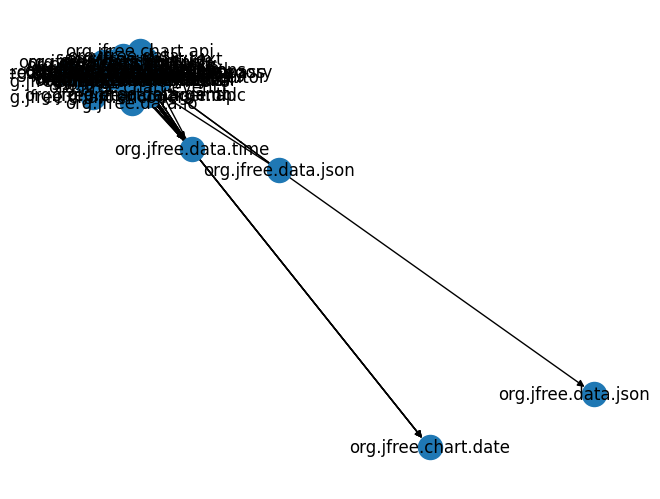

In [6]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [8]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t')
    return data

def remove_empty_rows(data):
    data = data.dropna(subset=['Name'])
    return data

def remove_unnamed_columns(data):
    data = data.filter(regex='^(?!Unnamed.*)')
    return data

def remove_nan_columns(data):
    data = data.dropna(axis=1, how='all')
    return data

def convert_ordinal_to_numerical(data):
    ordinal_mapping = {
        'low': 1,
        'low-medium': 2,
        'medium-high': 3,
        'high': 4,
        'very-high': 5
    }
    columns_to_convert = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']
    for column in columns_to_convert:
        data[column] = data[column].replace(ordinal_mapping)
    return data

dataset_file = "input/" + project_name + "/package-metrics-dataset.csv"
dataset = load_data(dataset_file)
dataset = remove_empty_rows(dataset)
dataset = remove_unnamed_columns(dataset)
dataset = remove_nan_columns(dataset)
dataset = convert_ordinal_to_numerical(dataset)

print(dataset.head())

                          QualifiedName                         Name   
1              <Package>org.jfree.chart              org.jfree.chart  \
2  <Package>org.jfree.chart.annotations  org.jfree.chart.annotations   
3          <Package>org.jfree.chart.api          org.jfree.chart.api   
4         <Package>org.jfree.chart.axis         org.jfree.chart.axis   
5        <Package>org.jfree.chart.block        org.jfree.chart.block   

   Complexity  Coupling  Size  Lack of Cohesion  #(C&I)    #C   #I     LOC   
1           3         1     3                 1    13.0   9.0  4.0  2441.0  \
2           2         3     3                 1    20.0  16.0  4.0  1929.0   
3           1         1     3                 1    14.0  13.0  1.0   418.0   
4           4         4     5                 1    46.0  44.0  2.0  7056.0   
5           2         3     3                 1    22.0  17.0  5.0  1723.0   

      AC    EC    Abs    Ins     ND     WMC  
1   64.0   5.0  0.462  0.072  0.466   576.0  
2    6

In [9]:
def label_god_component(row, complexity_threshold=2, size_threshold=2):
    if row['Complexity'] > complexity_threshold and row['Size'] > size_threshold:
        return 1
    else:
        return 0

# Label the dataset
dataset['is_god_component'] = dataset.apply(label_god_component, axis=1)

# Count the number of God Components
num_dataset_rows = dataset.shape[0]
num_god_components = dataset['is_god_component'].sum()
print(f'Number of instances in the dataset: {num_dataset_rows}')
print(f'Number of God Components in the dataset: {num_god_components}')

Number of instances in the dataset: 42
Number of God Components in the dataset: 11


In [10]:
def remove_labeling_columns(data):
    data = data.drop(['QualifiedName', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion'], axis=1)
    return data

dataset = remove_labeling_columns(dataset)
print(dataset.head())

                          Name  #(C&I)    #C   #I     LOC     AC    EC    Abs   
1              org.jfree.chart    13.0   9.0  4.0  2441.0   64.0   5.0  0.462  \
2  org.jfree.chart.annotations    20.0  16.0  4.0  1929.0    6.0  20.0  0.300   
3          org.jfree.chart.api    14.0  13.0  1.0   418.0  215.0   3.0  0.071   
4         org.jfree.chart.axis    46.0  44.0  2.0  7056.0   91.0  32.0  0.152   
5        org.jfree.chart.block    22.0  17.0  5.0  1723.0   19.0  18.0  0.227   

     Ins     ND     WMC  is_god_component  
1  0.072  0.466   576.0                 1  
2  0.769  0.069   457.0                 0  
3  0.014  0.915   105.0                 0  
4  0.260  0.588  1828.0                 1  
5  0.486  0.287   485.0                 0  


In [11]:
# Embedding software metrics in dataset to nodes in the graph
def get_node_embedding(node, data):
    node_embedding = data.loc[data['Name'] == node]
    return node_embedding

def get_node_embedding_list(graph, data):
    node_embedding_list = []
    for node, node_data in graph.nodes(data=True):
        node_embedding = get_node_embedding(node, data)
        node_data['NumberOfEntities'] = node_embedding['#(C&I)'].iloc[0]
        node_data['NumberOfClasses'] = node_embedding['#C'].iloc[0]
        node_data['NumberOfInterface'] = node_embedding['#I'].iloc[0]
        node_data['LOC'] = node_embedding['LOC'].iloc[0]
        node_data['AC'] = node_embedding['AC'].iloc[0]
        node_data['EC'] = node_embedding['EC'].iloc[0]
        node_data['Abstractness'] = node_embedding['Abs'].iloc[0]
        node_data['Instability'] = node_embedding['Ins'].iloc[0]
        node_data['NormalizedDistances'] = node_embedding['ND'].iloc[0]
        node_data['WMC'] = node_embedding['WMC'].iloc[0]
        node_data['is_god_component'] = node_embedding['is_god_component'].iloc[0]
        print('node_data: ', node_data)
    return node_embedding_list

node_embedding_list = get_node_embedding_list(G, dataset)
print(node_embedding_list)

node_data:  {'NumberOfEntities': 7.0, 'NumberOfClasses': 7.0, 'NumberOfInterface': 0.0, 'LOC': 1699.0, 'AC': 4.0, 'EC': 5.0, 'Abstractness': 0.143, 'Instability': 0.556, 'NormalizedDistances': 0.301, 'WMC': 447.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 6.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 1.0, 'LOC': 723.0, 'AC': 1.0, 'EC': 6.0, 'Abstractness': 0.167, 'Instability': 0.857, 'NormalizedDistances': 0.024, 'WMC': 222.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 8.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 0.0, 'LOC': 898.0, 'AC': 264.0, 'EC': 2.0, 'Abstractness': 0.0, 'Instability': 0.008, 'NormalizedDistances': 0.992, 'WMC': 257.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 10.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 2.0, 'LOC': 558.0, 'AC': 27.0, 'EC': 4.0, 'Abstractness': 0.2, 'Instability': 0.129, 'NormalizedDistances': 0.671, 'WMC': 140.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 3.0, 'NumberOfClasses'

In [12]:
# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.jfree.chart.plot.pie, embedding: {'NumberOfEntities': 7.0, 'NumberOfClasses': 7.0, 'NumberOfInterface': 0.0, 'LOC': 1699.0, 'AC': 4.0, 'EC': 5.0, 'Abstractness': 0.143, 'Instability': 0.556, 'NormalizedDistances': 0.301, 'WMC': 447.0, 'is_god_component': 0}
Node: org.jfree.data.gantt, embedding: {'NumberOfEntities': 6.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 1.0, 'LOC': 723.0, 'AC': 1.0, 'EC': 6.0, 'Abstractness': 0.167, 'Instability': 0.857, 'NormalizedDistances': 0.024, 'WMC': 222.0, 'is_god_component': 0}
Node: org.jfree.chart.internal, embedding: {'NumberOfEntities': 8.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 0.0, 'LOC': 898.0, 'AC': 264.0, 'EC': 2.0, 'Abstractness': 0.0, 'Instability': 0.008, 'NormalizedDistances': 0.992, 'WMC': 257.0, 'is_god_component': 0}
Node: org.jfree.chart.util, embedding: {'NumberOfEntities': 10.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 2.0, 'LOC': 558.0, 'AC': 27.0, 'EC': 4.0, 'Abstractness': 0.2, 'Instability': 0.129, 'Norma

In [15]:
# Save the graph data to a file
import pickle

with open('output/graph_data_for_god_component.pickle', 'wb') as file:
    pickle.dump(G, file)

In [16]:
# Load the graph data from a file
import pickle

with open('output/graph_data_for_god_component.pickle', 'rb') as file:
    G = pickle.load(file)

# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.jfree.chart.plot.pie, embedding: {'NumberOfEntities': 7.0, 'NumberOfClasses': 7.0, 'NumberOfInterface': 0.0, 'LOC': 1699.0, 'AC': 4.0, 'EC': 5.0, 'Abstractness': 0.143, 'Instability': 0.556, 'NormalizedDistances': 0.301, 'WMC': 447.0, 'is_god_component': 0}
Node: org.jfree.data.gantt, embedding: {'NumberOfEntities': 6.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 1.0, 'LOC': 723.0, 'AC': 1.0, 'EC': 6.0, 'Abstractness': 0.167, 'Instability': 0.857, 'NormalizedDistances': 0.024, 'WMC': 222.0, 'is_god_component': 0}
Node: org.jfree.chart.internal, embedding: {'NumberOfEntities': 8.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 0.0, 'LOC': 898.0, 'AC': 264.0, 'EC': 2.0, 'Abstractness': 0.0, 'Instability': 0.008, 'NormalizedDistances': 0.992, 'WMC': 257.0, 'is_god_component': 0}
Node: org.jfree.chart.util, embedding: {'NumberOfEntities': 10.0, 'NumberOfClasses': 8.0, 'NumberOfInterface': 2.0, 'LOC': 558.0, 'AC': 27.0, 'EC': 4.0, 'Abstractness': 0.2, 'Instability': 0.129, 'Norma